In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Data_v2
import Data_analysis_func
import Model_checks
import seaborn as sns
from sklearn.linear_model import LinearRegression
import Outlier_detection_v2
import Genes_self_similarity_v2

## Self similarity of genes (ie, which genes can be trusted)

In [196]:
data = Data_v2.get_format_data_without_na()
# data_norm = Data_v2.normalize_data_additive(data)

In [198]:
data_WT = data[data['mutant_ID'] == 'WT']

In [199]:
mean_intra_distance_for_WT = Genes_self_similarity_v2.get_mean_intra_distance_for_WT(data_WT)

In [166]:
mean_intra_distance_for_WT

,mean_intra_gene_distance_y2,mean_intra_gene_distance_ynpq,sample_count,light_regime,plate
0,0.246650,0.162724,3,10min-10min,1
1,0.103753,0.022338,3,10min-10min,2
2,0.023002,0.018011,3,10min-10min,3
3,0.163612,0.254971,3,10min-10min,4
4,0.048141,0.024673,3,10min-10min,5
5,0.020237,0.022660,3,10min-10min,6
6,0.034370,0.026405,3,10min-10min,7
7,0.049513,0.057386,3,10min-10min,8
8,0.047740,0.071712,3,10min-10min,9
9,0.091411,0.034149,3,10min-10min,10


In [200]:
weighted_avg_y2 = (mean_intra_distance_for_WT['mean_intra_gene_distance_y2'] * mean_intra_distance_for_WT['sample_count']).sum() / mean_intra_distance_for_WT['sample_count'].sum()
weighted_avg_ynpq = (mean_intra_distance_for_WT['mean_intra_gene_distance_ynpq'] * mean_intra_distance_for_WT['sample_count']).sum() / mean_intra_distance_for_WT['sample_count'].sum()

print("Weighted Average of mean_intra_gene_distance_y2:", weighted_avg_y2)
print("Weighted Average of mean_intra_gene_distance_ynpq:", weighted_avg_ynpq)

Weighted Average of mean_intra_gene_distance_y2: 0.06337416599846371
Weighted Average of mean_intra_gene_distance_ynpq: 0.061067412590697694


In [201]:
data_flagged = Genes_self_similarity_v2.apply_flagging_WT(data, threshold_distance_y2=2*weighted_avg_y2, threshold_distance_ynpq=2*weighted_avg_ynpq, p=(2/3), threshold_variance = 1)

In [205]:
pd.set_option('Display.max_rows', None)

In [202]:
data_flagged['flag_ynpq'].value_counts()

ok       3218
weird     215
Name: flag_ynpq, dtype: int64

In [194]:
data_flagged

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,ynpq_1,ynpq_2,ynpq_3,ynpq_4,ynpq_5,ynpq_6,ynpq_7,ynpq_8,ynpq_9,ynpq_10,ynpq_11,ynpq_12,ynpq_13,ynpq_14,ynpq_15,ynpq_16,ynpq_17,ynpq_18,ynpq_19,ynpq_20,ynpq_21,ynpq_22,ynpq_23,ynpq_24,ynpq_25,ynpq_26,ynpq_27,ynpq_28,ynpq_29,ynpq_30,ynpq_31,ynpq_32,ynpq_33,ynpq_34,ynpq_35,ynpq_36,ynpq_37,ynpq_38,ynpq_39,ynpq_40,ynpq_41,ynpq_42,ynpq_43,ynpq_44,ynpq_45,ynpq_46,ynpq_47,ynpq_48,ynpq_49,ynpq_50,ynpq_51,ynpq_52,ynpq_53,ynpq_54,ynpq_55,ynpq_56,ynpq_57,ynpq_58,ynpq_59,ynpq_60,ynpq_61,ynpq_62,ynpq_63,ynpq_64,ynpq_65,ynpq_66,ynpq_67,ynpq_68,ynpq_69,ynpq_70,ynpq_71,ynpq_72,ynpq_73,ynpq_74,ynpq_75,ynpq_76,ynpq_77,ynpq_78,ynpq_79,ynpq_80,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,F_0,Fm_0,F_1,Fm_1,F_2,Fm_2,F_3,Fm_3,F_4,Fm_4,F_5,Fm_5,F_6,Fm_6,F_7,Fm_7,F_8,Fm_8,F_9,Fm_9,F_10,Fm_10,F_11,Fm_11,F_12,Fm_12,F_13,Fm_13,F_14,Fm_14,F_15,Fm_15,F_16,Fm_16,F_17,Fm_17,F_18,Fm_18,F_19,Fm_19,F_20,Fm_20,F_21,Fm_21,F_22,Fm_22,F_23,Fm_23,F_24,Fm_24,F_25,Fm_25,F_26,Fm_26,F_27,Fm_27,F_28,Fm_28,F_29,Fm_29,F_30,Fm_30,F_31,Fm_31,F_32,Fm_32,F_33,Fm_33,F_34,Fm_34,F_35,Fm_35,F_36,Fm_36,F_37,Fm_37,F_38,Fm_38,F_39,Fm_39,F_40,Fm_40,F_41,Fm_41,F_42,Fm_42,F_43,Fm_43,F_44,Fm_44,F_45,Fm_45,F_46,Fm_46,F_47,Fm_47,F_48,Fm_48,F_49,Fm_49,F_50,Fm_50,F_51,Fm_51,F_52,Fm_52,F_53,Fm_53,F_54,Fm_54,F_55,Fm_55,F_56,Fm_56,F_57,Fm_57,F_58,Fm_58,F_59,Fm_59,F_60,Fm_60,F_61,Fm_61,F_62,Fm_62,F_63,Fm_63,F_64,Fm_64,F_65,Fm_65,F_66,Fm_66,F_67,Fm_67,F_68,Fm_68,F_69,Fm_69,F_70,Fm_70,F_71,Fm_71,F_72,Fm_72,F_73,Fm_73,F_74,Fm_74,F_75,Fm_75,F_76,Fm_76,F_77,Fm_77,F_78,Fm_78,F_79,Fm_79,F_80,Fm_80,F_81,Fm_81,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,ynpqend,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null,flag_y2,flag_ynpq
0,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,1,0.616078,23,0.251321,0.535883,0.227213,0.552219,0.203960,0.514637,0.22713

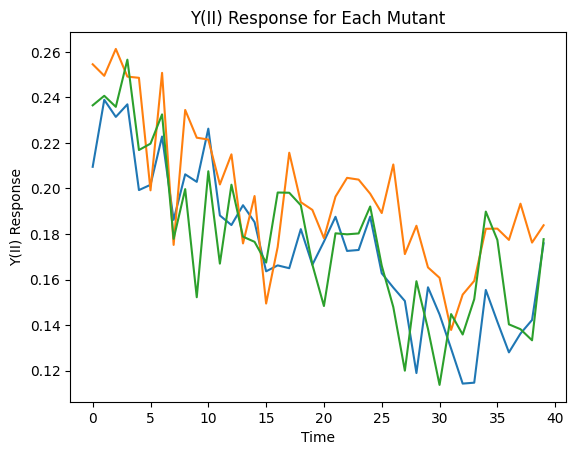

In [245]:
Data_analysis_func.plot_y2(data[(data['plate'] == 18) & (data['mutant_ID'] == 'WT') & (data['light_regime'] == '20h_HL')])

In [236]:
data[(data['plate'] == 18) & (data['mutant_ID'] == 'WT') & (data['light_regime'] == '1min-1min')]

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,ynpq_1,ynpq_2,ynpq_3,ynpq_4,ynpq_5,ynpq_6,ynpq_7,ynpq_8,ynpq_9,ynpq_10,ynpq_11,ynpq_12,ynpq_13,ynpq_14,ynpq_15,ynpq_16,ynpq_17,ynpq_18,ynpq_19,ynpq_20,ynpq_21,ynpq_22,ynpq_23,ynpq_24,ynpq_25,ynpq_26,ynpq_27,ynpq_28,ynpq_29,ynpq_30,ynpq_31,ynpq_32,ynpq_33,ynpq_34,ynpq_35,ynpq_36,ynpq_37,ynpq_38,ynpq_39,ynpq_40,ynpq_41,ynpq_42,ynpq_43,ynpq_44,ynpq_45,ynpq_46,ynpq_47,ynpq_48,ynpq_49,ynpq_50,ynpq_51,ynpq_52,ynpq_53,ynpq_54,ynpq_55,ynpq_56,ynpq_57,ynpq_58,ynpq_59,ynpq_60,ynpq_61,ynpq_62,ynpq_63,ynpq_64,ynpq_65,ynpq_66,ynpq_67,ynpq_68,ynpq_69,ynpq_70,ynpq_71,ynpq_72,ynpq_73,ynpq_74,ynpq_75,ynpq_76,ynpq_77,ynpq_78,ynpq_79,ynpq_80,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,F_0,Fm_0,F_1,Fm_1,F_2,Fm_2,F_3,Fm_3,F_4,Fm_4,F_5,Fm_5,F_6,Fm_6,F_7,Fm_7,F_8,Fm_8,F_9,Fm_9,F_10,Fm_10,F_11,Fm_11,F_12,Fm_12,F_13,Fm_13,F_14,Fm_14,F_15,Fm_15,F_16,Fm_16,F_17,Fm_17,F_18,Fm_18,F_19,Fm_19,F_20,Fm_20,F_21,Fm_21,F_22,Fm_22,F_23,Fm_23,F_24,Fm_24,F_25,Fm_25,F_26,Fm_26,F_27,Fm_27,F_28,Fm_28,F_29,Fm_29,F_30,Fm_30,F_31,Fm_31,F_32,Fm_32,F_33,Fm_33,F_34,Fm_34,F_35,Fm_35,F_36,Fm_36,F_37,Fm_37,F_38,Fm_38,F_39,Fm_39,F_40,Fm_40,F_41,Fm_41,F_42,Fm_42,F_43,Fm_43,F_44,Fm_44,F_45,Fm_45,F_46,Fm_46,F_47,Fm_47,F_48,Fm_48,F_49,Fm_49,F_50,Fm_50,F_51,Fm_51,F_52,Fm_52,F_53,Fm_53,F_54,Fm_54,F_55,Fm_55,F_56,Fm_56,F_57,Fm_57,F_58,Fm_58,F_59,Fm_59,F_60,Fm_60,F_61,Fm_61,F_62,Fm_62,F_63,Fm_63,F_64,Fm_64,F_65,Fm_65,F_66,Fm_66,F_67,Fm_67,F_68,Fm_68,F_69,Fm_69,F_70,Fm_70,F_71,Fm_71,F_72,Fm_72,F_73,Fm_73,F_74,Fm_74,F_75,Fm_75,F_76,Fm_76,F_77,Fm_77,F_78,Fm_78,F_79,Fm_79,F_80,Fm_80,F_81,Fm_81,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,ynpqend,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null
29686,18,M1,2024-03-01,1min-1min,18.655415,26.858334,164,2,11,0.617385,33,0.229574,0.514518,0.232100,0.521890,0.226218,0.507258,0.251923,0.498768,0.

In [263]:
data[(data['plate'] == 10) & (data['mutant_ID'] == 'WT') & (data['light_regime'] == '1min-1min')]

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,ynpq_1,ynpq_2,ynpq_3,ynpq_4,ynpq_5,ynpq_6,ynpq_7,ynpq_8,ynpq_9,ynpq_10,ynpq_11,ynpq_12,ynpq_13,ynpq_14,ynpq_15,ynpq_16,ynpq_17,ynpq_18,ynpq_19,ynpq_20,ynpq_21,ynpq_22,ynpq_23,ynpq_24,ynpq_25,ynpq_26,ynpq_27,ynpq_28,ynpq_29,ynpq_30,ynpq_31,ynpq_32,ynpq_33,ynpq_34,ynpq_35,ynpq_36,ynpq_37,ynpq_38,ynpq_39,ynpq_40,ynpq_41,ynpq_42,ynpq_43,ynpq_44,ynpq_45,ynpq_46,ynpq_47,ynpq_48,ynpq_49,ynpq_50,ynpq_51,ynpq_52,ynpq_53,ynpq_54,ynpq_55,ynpq_56,ynpq_57,ynpq_58,ynpq_59,ynpq_60,ynpq_61,ynpq_62,ynpq_63,ynpq_64,ynpq_65,ynpq_66,ynpq_67,ynpq_68,ynpq_69,ynpq_70,ynpq_71,ynpq_72,ynpq_73,ynpq_74,ynpq_75,ynpq_76,ynpq_77,ynpq_78,ynpq_79,ynpq_80,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,F_0,Fm_0,F_1,Fm_1,F_2,Fm_2,F_3,Fm_3,F_4,Fm_4,F_5,Fm_5,F_6,Fm_6,F_7,Fm_7,F_8,Fm_8,F_9,Fm_9,F_10,Fm_10,F_11,Fm_11,F_12,Fm_12,F_13,Fm_13,F_14,Fm_14,F_15,Fm_15,F_16,Fm_16,F_17,Fm_17,F_18,Fm_18,F_19,Fm_19,F_20,Fm_20,F_21,Fm_21,F_22,Fm_22,F_23,Fm_23,F_24,Fm_24,F_25,Fm_25,F_26,Fm_26,F_27,Fm_27,F_28,Fm_28,F_29,Fm_29,F_30,Fm_30,F_31,Fm_31,F_32,Fm_32,F_33,Fm_33,F_34,Fm_34,F_35,Fm_35,F_36,Fm_36,F_37,Fm_37,F_38,Fm_38,F_39,Fm_39,F_40,Fm_40,F_41,Fm_41,F_42,Fm_42,F_43,Fm_43,F_44,Fm_44,F_45,Fm_45,F_46,Fm_46,F_47,Fm_47,F_48,Fm_48,F_49,Fm_49,F_50,Fm_50,F_51,Fm_51,F_52,Fm_52,F_53,Fm_53,F_54,Fm_54,F_55,Fm_55,F_56,Fm_56,F_57,Fm_57,F_58,Fm_58,F_59,Fm_59,F_60,Fm_60,F_61,Fm_61,F_62,Fm_62,F_63,Fm_63,F_64,Fm_64,F_65,Fm_65,F_66,Fm_66,F_67,Fm_67,F_68,Fm_68,F_69,Fm_69,F_70,Fm_70,F_71,Fm_71,F_72,Fm_72,F_73,Fm_73,F_74,Fm_74,F_75,Fm_75,F_76,Fm_76,F_77,Fm_77,F_78,Fm_78,F_79,Fm_79,F_80,Fm_80,F_81,Fm_81,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,ynpqend,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null
14276,10,M1,2023-12-15,1min-1min,18.585787,27.033847,164,2,11,0.642891,40,0.270119,0.556798,0.248362,0.525018,0.256433,0.514126,0.241681,0.503667,0.

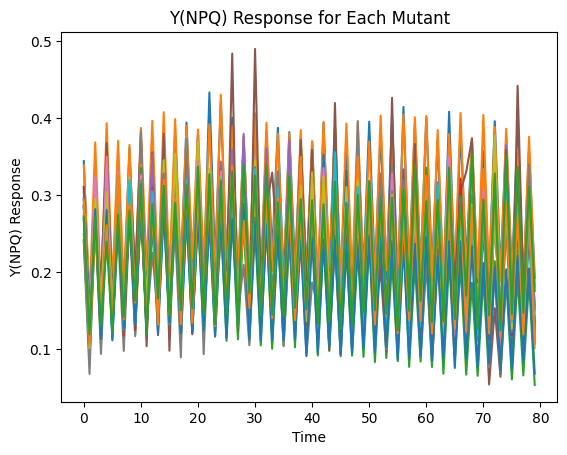

In [267]:
Data_analysis_func.plot_ynpq(data_flagged[(data_flagged['plate'] == 99) & (data_flagged['mutant_ID'] == 'WT') & (data_flagged['light_regime'] == '1min-1min') & (data_flagged['flag_ynpq'] == 'weird')])

In [ ]:
(data['well_id'] == 'N04') | (data['well_id'] == 'N02') | (data['well_id'] == 'M03') | (data['well_id'] == 'O03')

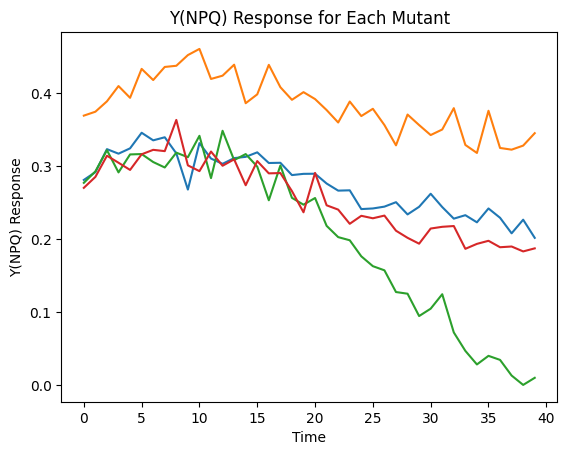

In [329]:
Data_analysis_func.plot_ynpq(data[(data['plate'] == 10) & ((data['well_id'] == 'M02') | (data['mutant_ID'] == 'WT')) & (data['light_regime'] == '20h_HL')])

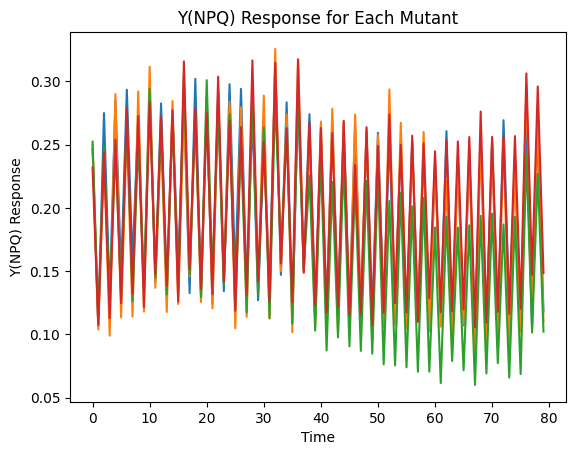

In [312]:
Data_analysis_func.plot_ynpq(data[(data['plate'] == 10) & ((data['mutant_ID'] == 'WT') | (data['well_id'] == 'L03')) & (data['light_regime'] == '1min-1min')])

In [303]:
len(data_flagged[(data_flagged['flag_ynpq'] == 'weird')])/len(data_flagged[(data_flagged['mutant_ID'] == 'WT')])

0.06262743955723857

In [289]:
data_flagged[(data_flagged['flag_y2'] == 'weird') & (data_flagged['plate'] == 99)][['well_id']].value_counts()

well_id
M03        7
P24        6
A17        6
A18        6
M04        6
M02        5
P10        5
N24        5
O02        5
I23        4
N01        4
P01        4
O01        3
H17        3
J17        3
G01        3
N03        3
O24        3
B02        3
P22        3
B18        3
F02        3
B03        3
P13        2
M01        2
L03        2
P09        2
K02        2
K01        2
P19        2
J01        2
N02        2
I02        2
P23        2
H01        2
L02        2
A02        2
D05        2
B01        2
C05        2
C04        2
E01        2
C03        2
C01        2
D01        2
E17        2
D02        2
E23        2
A24        2
B05        1
C23        1
A04        1
N05        1
N11        1
A10        1
A23        1
P15        1
O03        1
P05        1
O04        1
O05        1
O21        1
B24        1
P14        1
P02        1
P03        1
B22        1
F03        1
M24        1
G02        1
G03        1
F01        1
H02        1
H03        1
H22        1
I01        1
E20 

In [336]:
region = Data_analysis_func.get_region('K', 'P', 1, 4)

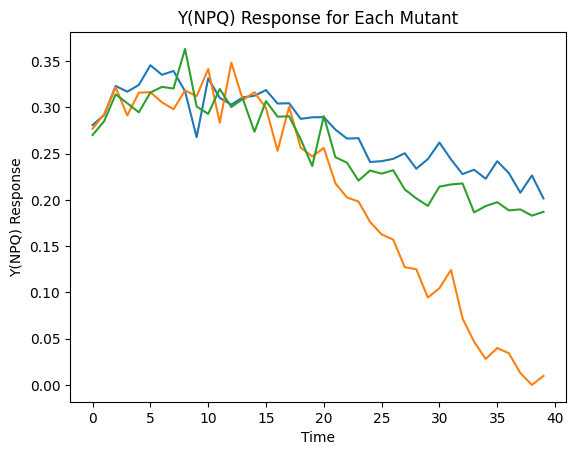

In [342]:
Data_analysis_func.plot_ynpq(data[(data['plate'] == 10) & (data['mutant_ID'] == 'WT') & (data['light_regime'] == '20h_HL')])

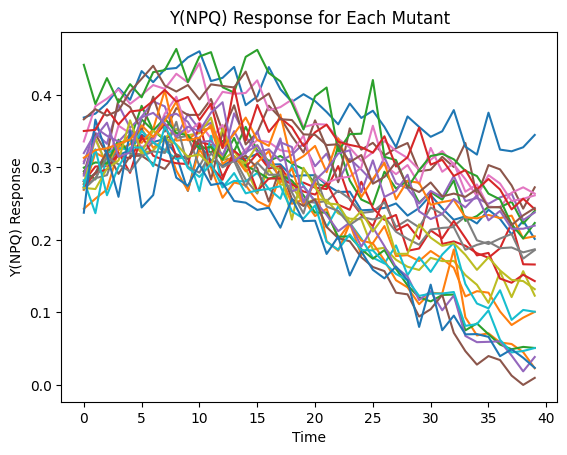

In [338]:
Data_analysis_func.plot_ynpq(data[(data['plate'] == 10) & ((data['mutant_ID'] == 'WT') | (data['well_id'].isin(region))) & (data['light_regime'] == '20h_HL')])

In [334]:
data_flagged[(data_flagged['flag_y2'] == 'weird') & (data_flagged['plate'] == 99)]

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,ynpq_1,ynpq_2,ynpq_3,ynpq_4,ynpq_5,ynpq_6,ynpq_7,ynpq_8,ynpq_9,ynpq_10,ynpq_11,ynpq_12,ynpq_13,ynpq_14,ynpq_15,ynpq_16,ynpq_17,ynpq_18,ynpq_19,ynpq_20,ynpq_21,ynpq_22,ynpq_23,ynpq_24,ynpq_25,ynpq_26,ynpq_27,ynpq_28,ynpq_29,ynpq_30,ynpq_31,ynpq_32,ynpq_33,ynpq_34,ynpq_35,ynpq_36,ynpq_37,ynpq_38,ynpq_39,ynpq_40,ynpq_41,ynpq_42,ynpq_43,ynpq_44,ynpq_45,ynpq_46,ynpq_47,ynpq_48,ynpq_49,ynpq_50,ynpq_51,ynpq_52,ynpq_53,ynpq_54,ynpq_55,ynpq_56,ynpq_57,ynpq_58,ynpq_59,ynpq_60,ynpq_61,ynpq_62,ynpq_63,ynpq_64,ynpq_65,ynpq_66,ynpq_67,ynpq_68,ynpq_69,ynpq_70,ynpq_71,ynpq_72,ynpq_73,ynpq_74,ynpq_75,ynpq_76,ynpq_77,ynpq_78,ynpq_79,ynpq_80,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,F_0,Fm_0,F_1,Fm_1,F_2,Fm_2,F_3,Fm_3,F_4,Fm_4,F_5,Fm_5,F_6,Fm_6,F_7,Fm_7,F_8,Fm_8,F_9,Fm_9,F_10,Fm_10,F_11,Fm_11,F_12,Fm_12,F_13,Fm_13,F_14,Fm_14,F_15,Fm_15,F_16,Fm_16,F_17,Fm_17,F_18,Fm_18,F_19,Fm_19,F_20,Fm_20,F_21,Fm_21,F_22,Fm_22,F_23,Fm_23,F_24,Fm_24,F_25,Fm_25,F_26,Fm_26,F_27,Fm_27,F_28,Fm_28,F_29,Fm_29,F_30,Fm_30,F_31,Fm_31,F_32,Fm_32,F_33,Fm_33,F_34,Fm_34,F_35,Fm_35,F_36,Fm_36,F_37,Fm_37,F_38,Fm_38,F_39,Fm_39,F_40,Fm_40,F_41,Fm_41,F_42,Fm_42,F_43,Fm_43,F_44,Fm_44,F_45,Fm_45,F_46,Fm_46,F_47,Fm_47,F_48,Fm_48,F_49,Fm_49,F_50,Fm_50,F_51,Fm_51,F_52,Fm_52,F_53,Fm_53,F_54,Fm_54,F_55,Fm_55,F_56,Fm_56,F_57,Fm_57,F_58,Fm_58,F_59,Fm_59,F_60,Fm_60,F_61,Fm_61,F_62,Fm_62,F_63,Fm_63,F_64,Fm_64,F_65,Fm_65,F_66,Fm_66,F_67,Fm_67,F_68,Fm_68,F_69,Fm_69,F_70,Fm_70,F_71,Fm_71,F_72,Fm_72,F_73,Fm_73,F_74,Fm_74,F_75,Fm_75,F_76,Fm_76,F_77,Fm_77,F_78,Fm_78,F_79,Fm_79,F_80,Fm_80,F_81,Fm_81,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,ynpqend,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null,flag_y2,flag_ynpq
15,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,16,0.586840,23,0.188097,0.481057,0.174606,0.501808,0.181475,0.482813,0.211

Text(0.5, 1.0, 'Position Frequency Heatmap for Mean Outliers divided by the number of mutants in each position')

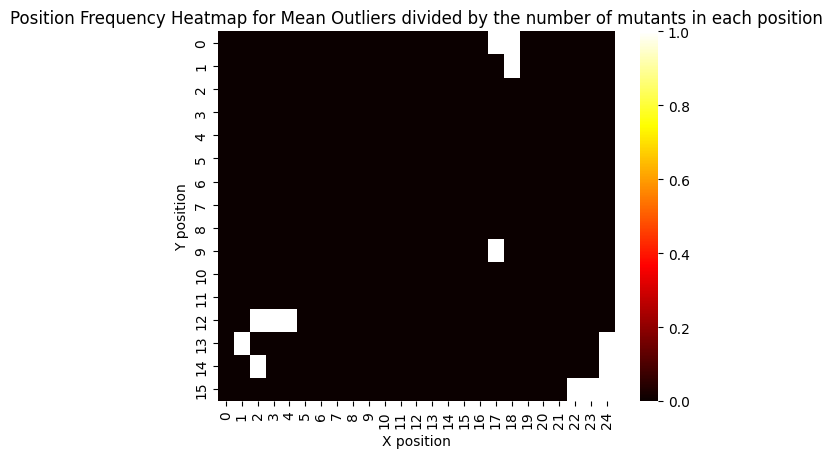

In [341]:
position_counts = data_flagged[(data_flagged['flag_y2'] == 'weird') & (data_flagged['plate'] == 99) & (data_flagged['start_date'] == '2023-12-06')]['well_id'].value_counts()
# position_counts = data['well_id'].value_counts()
# Extract x and y coordinates from positions
y = [ord(pos[0]) - ord('A') for pos in position_counts.index]  # Convert letters to numerical values for y-axis
x = [int(pos[1:]) for pos in position_counts.index]  # Extract numbers for x-axis

# Create a 2D grid to represent the lattice
max_x = max(x) + 1
max_y = max(y) + 1
frequency_grid = [[0] * max_x for _ in range(max_y)]

# Fill the frequency grid with position counts
for i, pos in enumerate(position_counts.index):
    frequency_grid[y[i]][x[i]] = position_counts[pos]

# Plot heatmap
sns.heatmap(frequency_grid, cmap='hot', fmt='d', cbar=True)

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Position Frequency Heatmap for Mean Outliers divided by the number of mutants in each position')


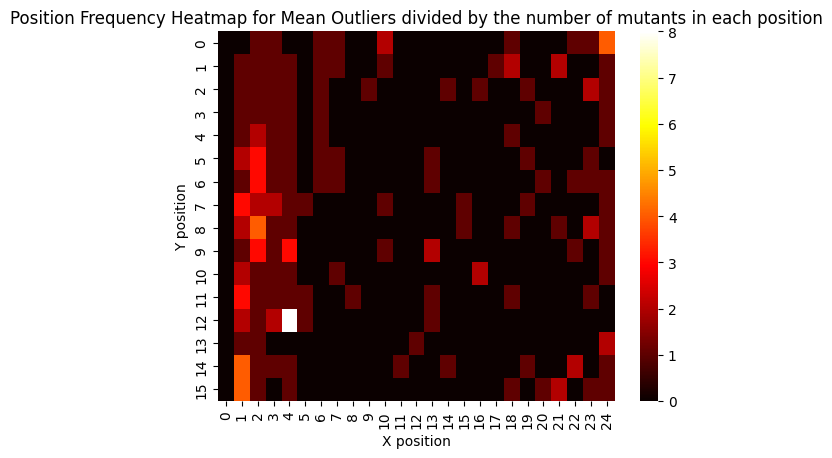

In [333]:
position_counts = data_flagged[(data_flagged['flag_ynpq'] == 'weird') & (data_flagged['plate'] == 99)]['well_id'].value_counts()
# position_counts = data['well_id'].value_counts()
# Extract x and y coordinates from positions
y = [ord(pos[0]) - ord('A') for pos in position_counts.index]  # Convert letters to numerical values for y-axis
x = [int(pos[1:]) for pos in position_counts.index]  # Extract numbers for x-axis

# Create a 2D grid to represent the lattice
max_x = max(x) + 1
max_y = max(y) + 1
frequency_grid = [[0] * max_x for _ in range(max_y)]

# Fill the frequency grid with position counts
for i, pos in enumerate(position_counts.index):
    frequency_grid[y[i]][x[i]] = position_counts[pos]

# Plot heatmap
sns.heatmap(frequency_grid, cmap='hot', fmt='d', cbar=True)

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Position Frequency Heatmap for Mean Outliers divided by the number of mutants in each position')

# Show plot
plt.show()

In [ ]:
position_counts = data_flagged[(data_flagged['flag_y2'] == 'weird') & (data_flagged['plate'] == 99)]['well_id'].value_counts()
# position_counts = data['well_id'].value_counts()
# Extract x and y coordinates from positions
y = [ord(pos[0]) - ord('A') for pos in position_counts.index]  # Convert letters to numerical values for y-axis
x = [int(pos[1:]) for pos in position_counts.index]  # Extract numbers for x-axis

# Create a 2D grid to represent the lattice
max_x = max(x) + 1
max_y = max(y) + 1
frequency_grid = [[0] * max_x for _ in range(max_y)]

# Fill the frequency grid with position counts
for i, pos in enumerate(position_counts.index):
    frequency_grid[y[i]][x[i]] = position_counts[pos]

# Plot heatmap
sns.heatmap(frequency_grid, cmap='hot', fmt='d', cbar=True)

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Position Frequency Heatmap for Mean Outliers divided by the number of mutants in each position')

# Show plot
plt.show()

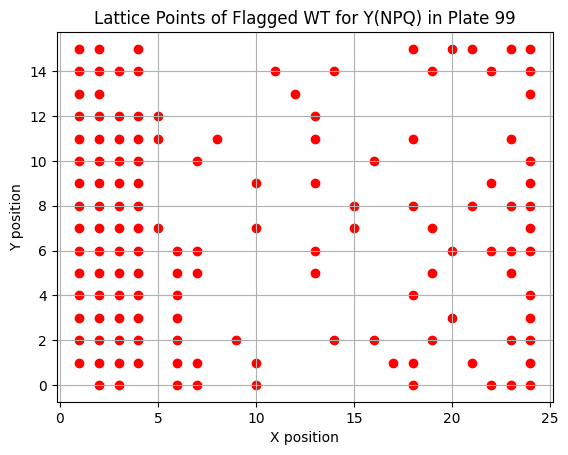

In [302]:
positions = data_flagged[(data_flagged['flag_ynpq'] == 'weird') & (data_flagged['plate'] == 99)]['well_id'].unique()

x = [ord(pos[0]) - ord('A') for pos in positions]  # Convert letters to numerical values
y = [int(pos[1:]) for pos in positions]  # Extract numbers

# Plot lattice points
plt.scatter(y, x, color='red')

# Add labels to points
# for i, txt in enumerate(positions):
#     plt.annotate(txt, (y[i], x[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Set axis labels
plt.xlabel('X position')
plt.ylabel('Y position')

# Set title
plt.title('Lattice Points of Flagged WT for Y(NPQ) in Plate 99')

# Show plot
plt.grid(True)
plt.show()

In [269]:
data_flagged[data_flagged['flag_ynpq'] == 'weird'][['light_regime', 'plate']].value_counts()

light_regime  plate
10min-10min   99       127
1min-1min     99        23
20h_HL        99        10
2h-2h         99        10
20h_ML        99         9
30s-30s       99         4
20h_HL        7          3
1min-1min     15         2
2h-2h         2          1
20h_HL        22         1
20h_ML        7          1
2h-2h         4          1
              3          1
20h_HL        17         1
2h-2h         7          1
              9          1
30s-30s       4          1
              9          1
20h_HL        21         1
10min-10min   4          1
20h_HL        13         1
              10         1
10min-10min   22         1
20h_HL        8          1
              4          1
              3          1
1min-1min     22         1
              21         1
              18         1
              13         1
              12         1
              11         1
              7          1
              2          1
20h_HL        9          1
dtype: int64

In [259]:
data_flagged[(data_flagged['flag_ynpq'] == 'weird') & (data_flagged['plate'] == 99)][['well_id']].value_counts()

well_id
M04        8
O01        4
I02        4
A24        4
P01        4
L01        3
H01        3
J02        3
J04        3
G02        3
F02        3
C23        2
M03        2
M01        2
E02        2
H03        2
K16        2
F01        2
K01        2
I23        2
H02        2
J13        2
I01        2
O22        2
N24        2
P21        2
A10        2
B21        2
B18        2
N12        1
P18        1
J24        1
J22        1
O24        1
P02        1
J10        1
P04        1
J03        1
I24        1
J01        1
K03        1
P20        1
I21        1
I18        1
I15        1
I04        1
I03        1
P23        1
K02        1
K07        1
K04        1
N02        1
N01        1
M13        1
M05        1
O02        1
O03        1
M02        1
L23        1
L18        1
L13        1
H24        1
L05        1
L04        1
L03        1
L02        1
O04        1
K24        1
O11        1
O14        1
O19        1
L08        1
A02        1
H19        1
D06        1
D03        1
D02 

In [4]:
res_norm = get_variance_for_genes(data_norm)

In [5]:
res = get_variance_for_genes(data)

In [6]:
get_mean_var_WT(res_norm)

0.0004911421720896167

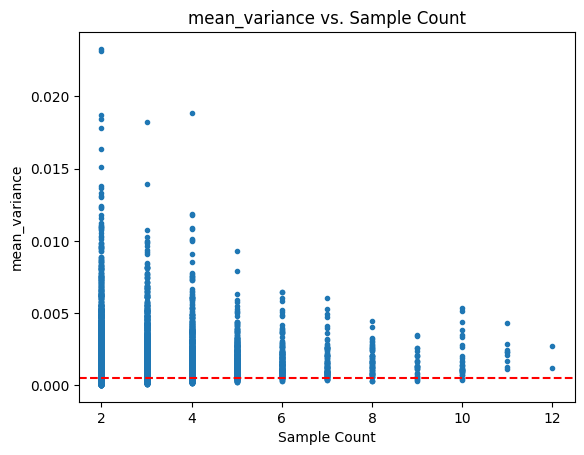

In [7]:
plot_genes_self_similarity(res_norm)

In [8]:
intra_distance_df = get_mean_intra_distance_for_genes(data)

In [9]:
intra_gene_distance_WT = get_mean_var_WT(intra_distance_df, type='mean_intra_gene_distance')

In [10]:
intra_gene_distance_WT

0.05872320571570141

In [122]:
intra_distance_norm_df = Genes_self_similarity_v2.get_mean_intra_distance_for_genes(data_norm)

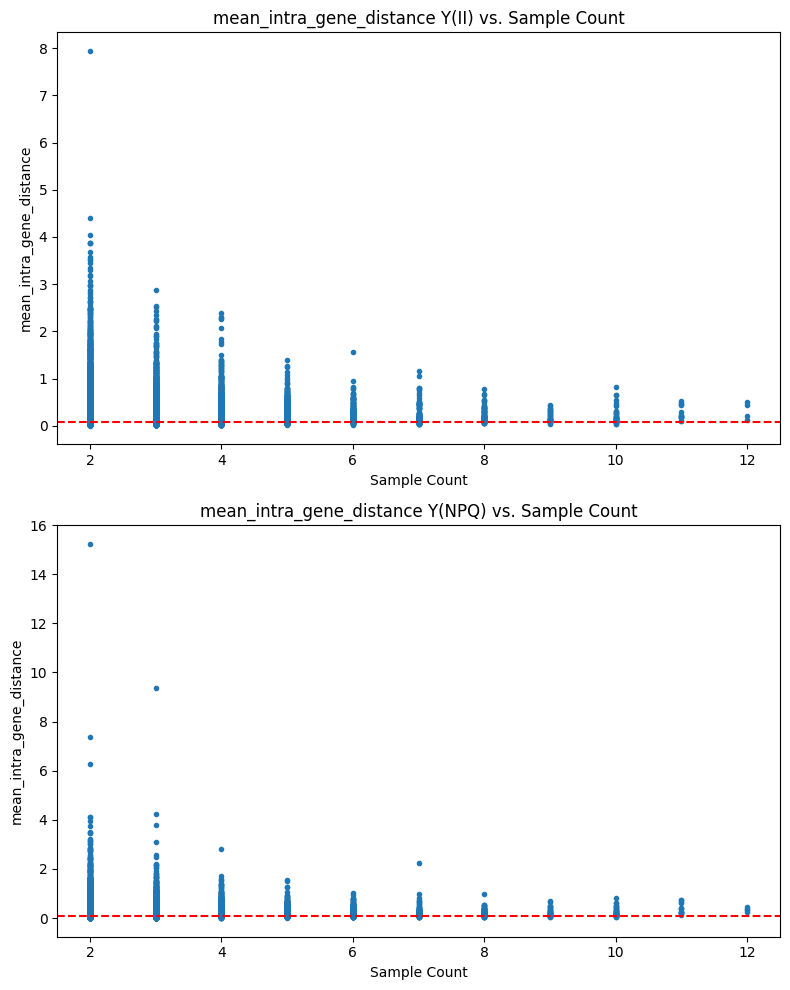

In [123]:
Genes_self_similarity_v2.plot_genes_self_similarity(intra_distance_norm_df, type='mean_intra_gene_distance')

In [124]:
intra_gene_distance_WT_norm_y2, intra_gene_distance_WT_norm_ynpq = Genes_self_similarity_v2.get_mean_var_WT(intra_distance_norm_df, type='mean_intra_gene_distance')

In [125]:
intra_gene_distance_WT_norm_y2, intra_gene_distance_WT_norm_ynpq

(0.0825945128178817, 0.07845159841687471)

In [142]:
2*intra_gene_distance_WT_norm_ynpq

0.15690319683374943

In [155]:
data_norm_flagged_1 = Genes_self_similarity_v2.apply_flagging(data_norm, threshold_distance_y2=2*intra_gene_distance_WT_norm_y2, threshold_distance_ynpq=2*intra_gene_distance_WT_norm_ynpq, threshold_variance=1)

In [41]:
data_norm_flagged_1

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,...,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null,fv_fm_WT,fv_fm_end_WT,end_ynpq_WT,flag_y2,flag_ynpq
0,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,1,-0.006258,...,1,0.015444,-0.004156,None,None,0.622337,0.591999,0.011219,ok,ok
1,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,2,-0.016211,...,2,0.009724,-0.011278,None,None,0.622337,0.591999,0.011219,ok,ok
2,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,3,-0.005031,...,3,-0.001730,0.002895,None,None,0.622337,0.591999,0.011219,ok,ok
3,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,4,-0.024731,...,4,-0.012957,-0.007927,None,None,0.622337,0.591999,0.011219,ok,ok
4,99,M1,2023-10-12,1min-1min,16.903264,24.476540,164,0,5,-0.003857,...,5,0.002020,-0.002748,None,None,0.622337,0.591999,0.011219,ok,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47157,6,M6,2024-04-22,30s-30s,15.294150,28.350881,164,15,19,-0.078833,...,379,-0.070806,-0.059098,None,None,0.638787,0.605804,0.002948,weird,weird
47158,6,M6,2024-04-22,30s-30s,15.294150,28.350881,164,15,20,-0.022608,...,380,-0.003735,-0.016046,None,None,0.638787,0.605804,0.002948,ok,weird
47159,6,M6,2024-04-22,30s-30s,15.294150,28.350881,164,15,21,-0.061109,...,381,-0.051220,-0.032174,None,None,0.638787,0.605804,0.002948,ok,ok
47160,6,M6,2024-04-22,30s-30s,15.294150,28.350881,164,15,22,-0.111192,...,382,-0.108574,-0.036320,None,None,0.638787,0.605804,0.002948,weird,ok


In [ ]:
data_norm_flagged_2 = apply_flagging_2(data_norm, alpha=0.05, threshold_variance=1)

In [127]:
data_norm_flagged_1['flag_y2'].value_counts()

ok       34192
weird    12970
Name: flag_y2, dtype: int64

In [158]:
data_norm_flagged_1['flag_ynpq'].value_counts()

ok       34104
weird    13058
Name: flag_ynpq, dtype: int64

In [157]:
data_norm_flagged_1[(data_norm_flagged_1['flag_y2'] == 'weird') & (data_norm_flagged_1['flag_ynpq'] == 'weird')]

KeyboardInterrupt: 

In [ ]:
data_norm_flagged_2[(data_norm_flagged_2['flag'] == 'weird') & (data_norm_flagged_2['mutant_ID'] == 'WT')]

,plate,measurement,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,...,date,euclidian_distances,median,outlier_euclidian_distance,outlier_median_distance,sigma,p_value,log_likelihood_null,fv_fm_WT,flag
578,99,M1,12,2,0.030262,18,0.037661,0.033177,0.057980,0.066496,...,2023-12-10,None,None,False,False,0.030036,None,None,0.621916,weird
579,99,M1,12,2,0.030262,18,0.037661,0.033177,0.057980,0.066496,...,2023-12-10,None,None,False,False,0.030036,None,None,0.621916,weird
580,99,M1,12,3,0.035335,24,0.060382,0.071047,0.074292,0.051516,...,2023-12-10,None,None,False,False,0.030036,None,None,0.621916,weird
581,99,M1,12,3,0.035335,24,0.060382,0.071047,0.074292,0.051516,...,2023-12-10,None,None,False,False,0.030036,None,None,0.621916,weird
810,99,M1,0,23,-0.019556,1,0.091955,0.053353,-0.038715,-0.011508,...,2023-01-12,None,None,False,False,0.030036,None,None,0.621916,weird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21770,14,M5,2,11,0.075595,31,0.070051,0.044128,0.029167,0.072023,...,2024-10-02,None,None,False,False,0.028038,None,None,0.640890,weird
22020,14,M5,13,21,-0.065552,39,-0.055471,-0.060502,-0.042456,-0.059059,...,2024-10-02,None,None,False,False,0.028038,None,None,0.640890,weird
23465,15,M3,13,2,0.027615,33,0.046282,0.042041,0.050344,0.064096,...,2024-02-14,None,None,False,False,0.031812,None,None,0.638595,weird
24201,15,M5,13,2,0.042421,62,0.050396,0.080479,0.082980,0.051368,...,2024-02-16,None,None,False,False,0.028038,None,None,0.654713,weird


In [102]:
one_gene = data_norm_flagged_1[(data_norm_flagged_1['mutated_genes'] == data_norm_flagged_1['mutated_genes'].iloc[1937]) & (data_norm_flagged_1['light_regime'] == '1min-1min')]
one_gene_ok = one_gene[one_gene['flag_ynpq'] == 'ok']

In [107]:
one_gene = data_norm_flagged_1[(data_norm_flagged_1['mutated_genes'] == data_norm_flagged_1['mutated_genes'].iloc[1936]) & (data_norm_flagged_1['light_regime'] == '20h_HL')]
# one_gene = data_norm_flagged_2[(data_norm_flagged_2['mutated_genes'] == data_norm_flagged_2['mutated_genes'].iloc[1805]) & (data_norm_flagged_2['light_regime'] == '1min-1min')]

In [64]:
one_gene['flag_ynpq'].value_counts()

ok       2
weird    1
Name: flag_ynpq, dtype: int64

In [71]:
pd.set_option('Display.max_columns', None)

In [74]:
data[data['light_regime'] == '20h_HL']

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,ynpq_1,ynpq_2,ynpq_3,ynpq_4,ynpq_5,ynpq_6,ynpq_7,ynpq_8,ynpq_9,ynpq_10,ynpq_11,ynpq_12,ynpq_13,ynpq_14,ynpq_15,ynpq_16,ynpq_17,ynpq_18,ynpq_19,ynpq_20,ynpq_21,ynpq_22,ynpq_23,ynpq_24,ynpq_25,ynpq_26,ynpq_27,ynpq_28,ynpq_29,ynpq_30,ynpq_31,ynpq_32,ynpq_33,ynpq_34,ynpq_35,ynpq_36,ynpq_37,ynpq_38,ynpq_39,ynpq_40,ynpq_41,ynpq_42,ynpq_43,ynpq_44,ynpq_45,ynpq_46,ynpq_47,ynpq_48,ynpq_49,ynpq_50,ynpq_51,ynpq_52,ynpq_53,ynpq_54,ynpq_55,ynpq_56,ynpq_57,ynpq_58,ynpq_59,ynpq_60,ynpq_61,ynpq_62,ynpq_63,ynpq_64,ynpq_65,ynpq_66,ynpq_67,ynpq_68,ynpq_69,ynpq_70,ynpq_71,ynpq_72,ynpq_73,ynpq_74,ynpq_75,ynpq_76,ynpq_77,ynpq_78,ynpq_79,ynpq_80,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,F_0,Fm_0,F_1,Fm_1,F_2,Fm_2,F_3,Fm_3,F_4,Fm_4,F_5,Fm_5,F_6,Fm_6,F_7,Fm_7,F_8,Fm_8,F_9,Fm_9,F_10,Fm_10,F_11,Fm_11,F_12,Fm_12,F_13,Fm_13,F_14,Fm_14,F_15,Fm_15,F_16,Fm_16,F_17,Fm_17,F_18,Fm_18,F_19,Fm_19,F_20,Fm_20,F_21,Fm_21,F_22,Fm_22,F_23,Fm_23,F_24,Fm_24,F_25,Fm_25,F_26,Fm_26,F_27,Fm_27,F_28,Fm_28,F_29,Fm_29,F_30,Fm_30,F_31,Fm_31,F_32,Fm_32,F_33,Fm_33,F_34,Fm_34,F_35,Fm_35,F_36,Fm_36,F_37,Fm_37,F_38,Fm_38,F_39,Fm_39,F_40,Fm_40,F_41,Fm_41,F_42,Fm_42,F_43,Fm_43,F_44,Fm_44,F_45,Fm_45,F_46,Fm_46,F_47,Fm_47,F_48,Fm_48,F_49,Fm_49,F_50,Fm_50,F_51,Fm_51,F_52,Fm_52,F_53,Fm_53,F_54,Fm_54,F_55,Fm_55,F_56,Fm_56,F_57,Fm_57,F_58,Fm_58,F_59,Fm_59,F_60,Fm_60,F_61,Fm_61,F_62,Fm_62,F_63,Fm_63,F_64,Fm_64,F_65,Fm_65,F_66,Fm_66,F_67,Fm_67,F_68,Fm_68,F_69,Fm_69,F_70,Fm_70,F_71,Fm_71,F_72,Fm_72,F_73,Fm_73,F_74,Fm_74,F_75,Fm_75,F_76,Fm_76,F_77,Fm_77,F_78,Fm_78,F_79,Fm_79,F_80,Fm_80,F_81,Fm_81,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,end_ynpq,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null
1130,2,M3,2023-10-20,20h_HL,19.047878,24.634703,84,0,1,0.651622,17,0.279940,0.215194,0.213825,0.248843,0.220861,0.195736,0.194909,0.207332,0.186058

In [131]:
len(data_norm_flagged_1[(data_norm_flagged_1['mutant_ID'] == 'WT') & (data_norm_flagged_1['flag_ynpq'] == 'weird')])/len(data_norm_flagged_1[(data_norm_flagged_1['mutant_ID'] == 'WT')])

0.03757646373434314

In [120]:
data_norm_flagged_1[(data_norm_flagged_1['plate'] == 2) & (data_norm_flagged_1['mutant_ID'] == 'WT')]

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,ynpq_1,ynpq_2,ynpq_3,ynpq_4,ynpq_5,ynpq_6,ynpq_7,ynpq_8,ynpq_9,ynpq_10,ynpq_11,ynpq_12,ynpq_13,ynpq_14,ynpq_15,ynpq_16,ynpq_17,ynpq_18,ynpq_19,ynpq_20,ynpq_21,ynpq_22,ynpq_23,ynpq_24,ynpq_25,ynpq_26,ynpq_27,ynpq_28,ynpq_29,ynpq_30,ynpq_31,ynpq_32,ynpq_33,ynpq_34,ynpq_35,ynpq_36,ynpq_37,ynpq_38,ynpq_39,ynpq_40,ynpq_41,ynpq_42,ynpq_43,ynpq_44,ynpq_45,ynpq_46,ynpq_47,ynpq_48,ynpq_49,ynpq_50,ynpq_51,ynpq_52,ynpq_53,ynpq_54,ynpq_55,ynpq_56,ynpq_57,ynpq_58,ynpq_59,ynpq_60,ynpq_61,ynpq_62,ynpq_63,ynpq_64,ynpq_65,ynpq_66,ynpq_67,ynpq_68,ynpq_69,ynpq_70,ynpq_71,ynpq_72,ynpq_73,ynpq_74,ynpq_75,ynpq_76,ynpq_77,ynpq_78,ynpq_79,ynpq_80,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,F_0,Fm_0,F_1,Fm_1,F_2,Fm_2,F_3,Fm_3,F_4,Fm_4,F_5,Fm_5,F_6,Fm_6,F_7,Fm_7,F_8,Fm_8,F_9,Fm_9,F_10,Fm_10,F_11,Fm_11,F_12,Fm_12,F_13,Fm_13,F_14,Fm_14,F_15,Fm_15,F_16,Fm_16,F_17,Fm_17,F_18,Fm_18,F_19,Fm_19,F_20,Fm_20,F_21,Fm_21,F_22,Fm_22,F_23,Fm_23,F_24,Fm_24,F_25,Fm_25,F_26,Fm_26,F_27,Fm_27,F_28,Fm_28,F_29,Fm_29,F_30,Fm_30,F_31,Fm_31,F_32,Fm_32,F_33,Fm_33,F_34,Fm_34,F_35,Fm_35,F_36,Fm_36,F_37,Fm_37,F_38,Fm_38,F_39,Fm_39,F_40,Fm_40,F_41,Fm_41,F_42,Fm_42,F_43,Fm_43,F_44,Fm_44,F_45,Fm_45,F_46,Fm_46,F_47,Fm_47,F_48,Fm_48,F_49,Fm_49,F_50,Fm_50,F_51,Fm_51,F_52,Fm_52,F_53,Fm_53,F_54,Fm_54,F_55,Fm_55,F_56,Fm_56,F_57,Fm_57,F_58,Fm_58,F_59,Fm_59,F_60,Fm_60,F_61,Fm_61,F_62,Fm_62,F_63,Fm_63,F_64,Fm_64,F_65,Fm_65,F_66,Fm_66,F_67,Fm_67,F_68,Fm_68,F_69,Fm_69,F_70,Fm_70,F_71,Fm_71,F_72,Fm_72,F_73,Fm_73,F_74,Fm_74,F_75,Fm_75,F_76,Fm_76,F_77,Fm_77,F_78,Fm_78,F_79,Fm_79,F_80,Fm_80,F_81,Fm_81,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,end_ynpq,ynpqend,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null,fv_fm_WT,fv_fm_end_WT,ynpqend_WT,flag_y2,flag_ynpq
1586,2,M1,2023-10-18,1min-1min,17.221402,25.338585,164,2,11,0.015025,29,-0.000803,0.0140

In [133]:
pd.set_option('Display.max_rows', None)

In [143]:
group = data_norm_flagged_1[(data_norm_flagged_1['mutant_ID'] == 'WT') & (data_norm_flagged_1['light_regime'] == '1min-1min') & (data_norm_flagged_1['plate'] == 7)]

In [144]:
distances_y2, distances_ynpq, var = Genes_self_similarity_v2.calculate_distances_var(group, '1min-1min')

In [149]:
threshold_distance_y2 = 2*intra_gene_distance_WT_norm_y2
threshold_distance_ynpq = 2*intra_gene_distance_WT_norm_ynpq
threshold_variance = 1
p = 2/3

In [150]:
num_series = len(group)
ok_indices_y2 = []
ok_indices_ynpq = []

for i in range(num_series):
    close_count_y2 = sum(1 for d in distances_y2[i] if d < threshold_distance_y2)
    close_count_ynpq = sum(1 for d in distances_ynpq[i] if d < threshold_distance_ynpq)
    if close_count_y2 >= p*num_series and var[i] < threshold_variance:
        ok_indices_y2.append(i)
    if close_count_ynpq >= p*num_series and var[i] < threshold_variance:
        ok_indices_ynpq.append(i)
flags_y2 = ['ok' if i in ok_indices_y2 else 'weird' for i in range(num_series)]
flags_ynpq = ['ok' if i in ok_indices_ynpq else 'weird' for i in range(num_series)]

In [160]:
flags_ynpq

['ok', 'weird', 'ok']

In [159]:
data_norm_flagged_1[(data_norm_flagged_1['mutant_ID'] == 'WT') & (data_norm_flagged_1['light_regime'] == '1min-1min') & (data_norm_flagged_1['plate'] == 7)]

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,ynpq_1,ynpq_2,ynpq_3,ynpq_4,ynpq_5,ynpq_6,ynpq_7,ynpq_8,ynpq_9,ynpq_10,ynpq_11,ynpq_12,ynpq_13,ynpq_14,ynpq_15,ynpq_16,ynpq_17,ynpq_18,ynpq_19,ynpq_20,ynpq_21,ynpq_22,ynpq_23,ynpq_24,ynpq_25,ynpq_26,ynpq_27,ynpq_28,ynpq_29,ynpq_30,ynpq_31,ynpq_32,ynpq_33,ynpq_34,ynpq_35,ynpq_36,ynpq_37,ynpq_38,ynpq_39,ynpq_40,ynpq_41,ynpq_42,ynpq_43,ynpq_44,ynpq_45,ynpq_46,ynpq_47,ynpq_48,ynpq_49,ynpq_50,ynpq_51,ynpq_52,ynpq_53,ynpq_54,ynpq_55,ynpq_56,ynpq_57,ynpq_58,ynpq_59,ynpq_60,ynpq_61,ynpq_62,ynpq_63,ynpq_64,ynpq_65,ynpq_66,ynpq_67,ynpq_68,ynpq_69,ynpq_70,ynpq_71,ynpq_72,ynpq_73,ynpq_74,ynpq_75,ynpq_76,ynpq_77,ynpq_78,ynpq_79,ynpq_80,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,F_0,Fm_0,F_1,Fm_1,F_2,Fm_2,F_3,Fm_3,F_4,Fm_4,F_5,Fm_5,F_6,Fm_6,F_7,Fm_7,F_8,Fm_8,F_9,Fm_9,F_10,Fm_10,F_11,Fm_11,F_12,Fm_12,F_13,Fm_13,F_14,Fm_14,F_15,Fm_15,F_16,Fm_16,F_17,Fm_17,F_18,Fm_18,F_19,Fm_19,F_20,Fm_20,F_21,Fm_21,F_22,Fm_22,F_23,Fm_23,F_24,Fm_24,F_25,Fm_25,F_26,Fm_26,F_27,Fm_27,F_28,Fm_28,F_29,Fm_29,F_30,Fm_30,F_31,Fm_31,F_32,Fm_32,F_33,Fm_33,F_34,Fm_34,F_35,Fm_35,F_36,Fm_36,F_37,Fm_37,F_38,Fm_38,F_39,Fm_39,F_40,Fm_40,F_41,Fm_41,F_42,Fm_42,F_43,Fm_43,F_44,Fm_44,F_45,Fm_45,F_46,Fm_46,F_47,Fm_47,F_48,Fm_48,F_49,Fm_49,F_50,Fm_50,F_51,Fm_51,F_52,Fm_52,F_53,Fm_53,F_54,Fm_54,F_55,Fm_55,F_56,Fm_56,F_57,Fm_57,F_58,Fm_58,F_59,Fm_59,F_60,Fm_60,F_61,Fm_61,F_62,Fm_62,F_63,Fm_63,F_64,Fm_64,F_65,Fm_65,F_66,Fm_66,F_67,Fm_67,F_68,Fm_68,F_69,Fm_69,F_70,Fm_70,F_71,Fm_71,F_72,Fm_72,F_73,Fm_73,F_74,Fm_74,F_75,Fm_75,F_76,Fm_76,F_77,Fm_77,F_78,Fm_78,F_79,Fm_79,F_80,Fm_80,F_81,Fm_81,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,ynpqend,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null,fv_fm_WT,fv_fm_end_WT,ynpqend_WT,flag_y2,flag_ynpq
9311,7,M1,2023-11-17,1min-1min,17.945651,26.886477,164,2,11,-0.000317,15,-0.004744,-0.014835,-0.0

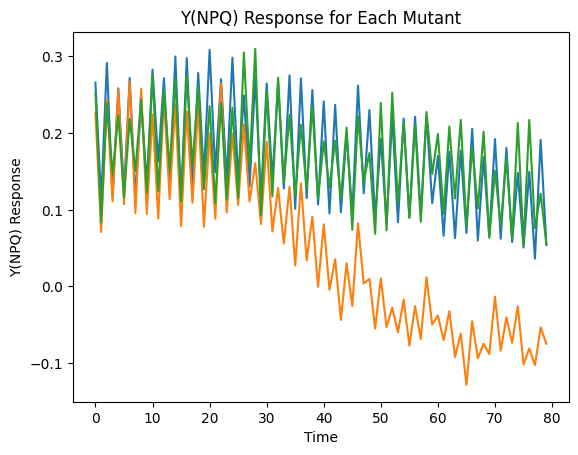

In [154]:
Data_analysis_func.plot_ynpq(data[(data['mutant_ID'] == 'WT') & (data['light_regime'] == '1min-1min') & (data['plate'] == 7)])

In [136]:
data_norm_flagged_1[(data_norm_flagged_1['mutant_ID'] == 'WT') & (data_norm_flagged_1['flag_ynpq'] == 'weird')][['plate', 'light_regime']].value_counts()

plate  light_regime
99     10min-10min     77
       1min-1min       13
       2h-2h            5
       20h_ML           4
       20h_HL           4
7      1min-1min        3
9      20h_HL           3
99     30s-30s          2
7      20h_HL           2
21     20h_HL           2
18     1min-1min        1
22     10min-10min      1
21     1min-1min        1
3      20h_HL           1
13     20h_HL           1
4      10min-10min      1
10     20h_HL           1
9      2h-2h            1
8      20h_HL           1
7      2h-2h            1
       20h_ML           1
4      30s-30s          1
       20h_HL           1
13     1min-1min        1
dtype: int64

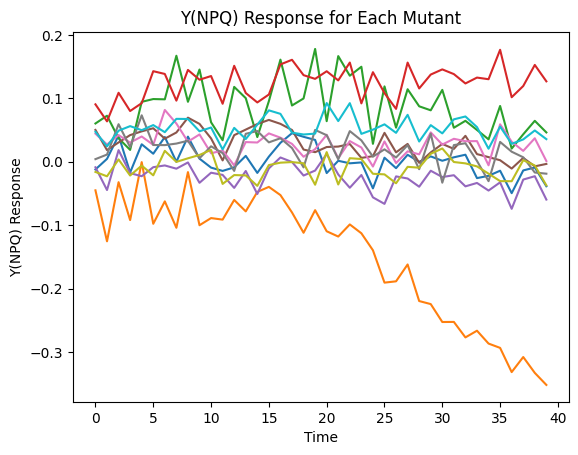

In [103]:
Data_analysis_func.plot_ynpq(data_norm[data_norm['light_regime'] == '20h_HL'].iloc[:10])

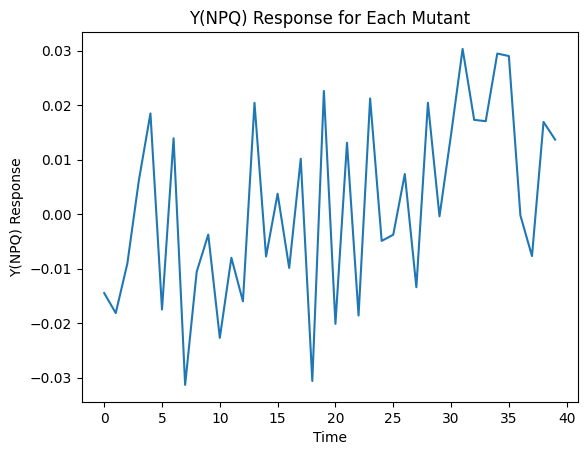

In [110]:
Data_analysis_func.plot_ynpq(one_gene[one_gene['flag_ynpq'] == 'ok'])

In [109]:
Genes_self_similarity_v2.calculate_distances_var(one_gene, '20h_HL')

(array([[0.        , 0.06177503, 0.46922928, 0.04990397],
        [0.06177503, 0.        , 0.24261913, 0.1678756 ],
        [0.46922928, 0.24261913, 0.        , 0.70309663],
        [0.04990397, 0.1678756 , 0.70309663, 0.        ]]),
 array([[0.        , 0.01607148, 0.9433282 , 0.10716723],
        [0.01607148, 0.        , 1.05113328, 0.08283633],
        [0.9433282 , 1.05113328, 0.        , 1.5382874 ],
        [0.10716723, 0.08283633, 1.5382874 , 0.        ]]),
 array([0.0002868 , 0.00045369, 0.0005558 , 0.00027952], dtype=float32))

In [87]:
one_gene

,plate,measurement,start_date,light_regime,dark_threshold,light_threshold,num_frames,i,j,fv_fm,mask_area,y2_1,y2_2,y2_3,y2_4,y2_5,y2_6,y2_7,y2_8,y2_9,y2_10,y2_11,y2_12,y2_13,y2_14,y2_15,y2_16,y2_17,y2_18,y2_19,y2_20,y2_21,y2_22,y2_23,y2_24,y2_25,y2_26,y2_27,y2_28,y2_29,y2_30,y2_31,y2_32,y2_33,y2_34,y2_35,y2_36,y2_37,y2_38,y2_39,y2_40,y2_41,y2_42,y2_43,y2_44,y2_45,y2_46,y2_47,y2_48,y2_49,y2_50,y2_51,y2_52,y2_53,y2_54,y2_55,y2_56,y2_57,y2_58,y2_59,y2_60,y2_61,y2_62,y2_63,y2_64,y2_65,y2_66,y2_67,y2_68,y2_69,y2_70,y2_71,y2_72,y2_73,y2_74,y2_75,y2_76,y2_77,y2_78,y2_79,y2_80,ynpq_1,ynpq_2,ynpq_3,ynpq_4,ynpq_5,ynpq_6,ynpq_7,ynpq_8,ynpq_9,ynpq_10,ynpq_11,ynpq_12,ynpq_13,ynpq_14,ynpq_15,ynpq_16,ynpq_17,ynpq_18,ynpq_19,ynpq_20,ynpq_21,ynpq_22,ynpq_23,ynpq_24,ynpq_25,ynpq_26,ynpq_27,ynpq_28,ynpq_29,ynpq_30,ynpq_31,ynpq_32,ynpq_33,ynpq_34,ynpq_35,ynpq_36,ynpq_37,ynpq_38,ynpq_39,ynpq_40,ynpq_41,ynpq_42,ynpq_43,ynpq_44,ynpq_45,ynpq_46,ynpq_47,ynpq_48,ynpq_49,ynpq_50,ynpq_51,ynpq_52,ynpq_53,ynpq_54,ynpq_55,ynpq_56,ynpq_57,ynpq_58,ynpq_59,ynpq_60,ynpq_61,ynpq_62,ynpq_63,ynpq_64,ynpq_65,ynpq_66,ynpq_67,ynpq_68,ynpq_69,ynpq_70,ynpq_71,ynpq_72,ynpq_73,ynpq_74,ynpq_75,ynpq_76,ynpq_77,ynpq_78,ynpq_79,ynpq_80,measurement_time_0,measurement_time_1,measurement_time_2,measurement_time_3,measurement_time_4,measurement_time_5,measurement_time_6,measurement_time_7,measurement_time_8,measurement_time_9,measurement_time_10,measurement_time_11,measurement_time_12,measurement_time_13,measurement_time_14,measurement_time_15,measurement_time_16,measurement_time_17,measurement_time_18,measurement_time_19,measurement_time_20,measurement_time_21,measurement_time_22,measurement_time_23,measurement_time_24,measurement_time_25,measurement_time_26,measurement_time_27,measurement_time_28,measurement_time_29,measurement_time_30,measurement_time_31,measurement_time_32,measurement_time_33,measurement_time_34,measurement_time_35,measurement_time_36,measurement_time_37,measurement_time_38,measurement_time_39,measurement_time_40,measurement_time_41,measurement_time_42,measurement_time_43,measurement_time_44,measurement_time_45,measurement_time_46,measurement_time_47,measurement_time_48,measurement_time_49,measurement_time_50,measurement_time_51,measurement_time_52,measurement_time_53,measurement_time_54,measurement_time_55,measurement_time_56,measurement_time_57,measurement_time_58,measurement_time_59,measurement_time_60,measurement_time_61,measurement_time_62,measurement_time_63,measurement_time_64,measurement_time_65,measurement_time_66,measurement_time_67,measurement_time_68,measurement_time_69,measurement_time_70,measurement_time_71,measurement_time_72,measurement_time_73,measurement_time_74,measurement_time_75,measurement_time_76,measurement_time_77,measurement_time_78,measurement_time_79,measurement_time_80,measurement_time_81,F_0,Fm_0,F_1,Fm_1,F_2,Fm_2,F_3,Fm_3,F_4,Fm_4,F_5,Fm_5,F_6,Fm_6,F_7,Fm_7,F_8,Fm_8,F_9,Fm_9,F_10,Fm_10,F_11,Fm_11,F_12,Fm_12,F_13,Fm_13,F_14,Fm_14,F_15,Fm_15,F_16,Fm_16,F_17,Fm_17,F_18,Fm_18,F_19,Fm_19,F_20,Fm_20,F_21,Fm_21,F_22,Fm_22,F_23,Fm_23,F_24,Fm_24,F_25,Fm_25,F_26,Fm_26,F_27,Fm_27,F_28,Fm_28,F_29,Fm_29,F_30,Fm_30,F_31,Fm_31,F_32,Fm_32,F_33,Fm_33,F_34,Fm_34,F_35,Fm_35,F_36,Fm_36,F_37,Fm_37,F_38,Fm_38,F_39,Fm_39,F_40,Fm_40,F_41,Fm_41,F_42,Fm_42,F_43,Fm_43,F_44,Fm_44,F_45,Fm_45,F_46,Fm_46,F_47,Fm_47,F_48,Fm_48,F_49,Fm_49,F_50,Fm_50,F_51,Fm_51,F_52,Fm_52,F_53,Fm_53,F_54,Fm_54,F_55,Fm_55,F_56,Fm_56,F_57,Fm_57,F_58,Fm_58,F_59,Fm_59,F_60,Fm_60,F_61,Fm_61,F_62,Fm_62,F_63,Fm_63,F_64,Fm_64,F_65,Fm_65,F_66,Fm_66,F_67,Fm_67,F_68,Fm_68,F_69,Fm_69,F_70,Fm_70,F_71,Fm_71,F_72,Fm_72,F_73,Fm_73,F_74,Fm_74,F_75,Fm_75,F_76,Fm_76,F_77,Fm_77,F_78,Fm_78,F_79,Fm_79,F_80,Fm_80,F_81,Fm_81,well_id,mutant_ID,feature,mutated_genes,num_mutations,fv_fm_end,end_ynpq,well_id_numeric,mean_y2,mean_ynpq,median,log_likelihood_null,fv_fm_WT,fv_fm_end_WT,end_ynpq_WT,flag_y2,flag_ynpq
1938,2,M3,2023-10-20,20h_HL,19.047878,24.634703,84,1,22,-0.091390,49,-0.110878,-0.117911,-0.114

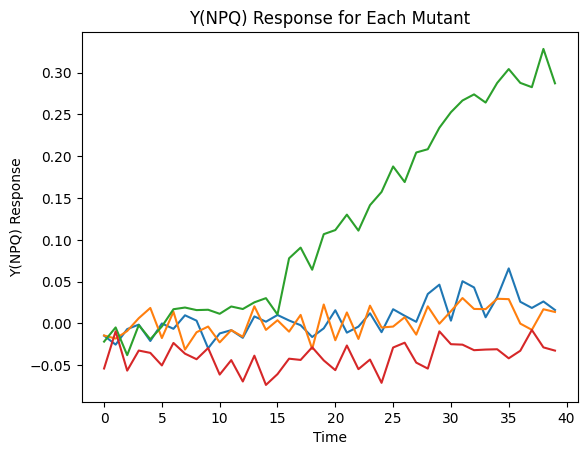

In [108]:
Data_analysis_func.plot_ynpq(one_gene)

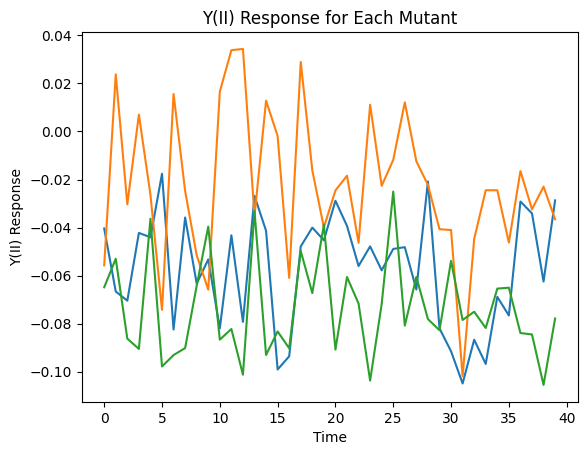

In [61]:
plot_y2(one_gene)

In [ ]:
data = get_format_data_without_na()
data_norm = normalize_data_additive(data)

In [ ]:
proportions

[0.5516963344290765,
 0.5516963344290765,
 0.5516963344290765,
 0.5516963344290765,
 0.5516963344290765]

In [ ]:
p_list = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 1]
proportions = []

for p in p_list:
    data_norm_flagged = get_data_norm_flagged(data_norm, p)
    proportion = data_norm_flagged['flag'].value_counts()['weird'] / len(data_norm_flagged)
    proportions.append(proportion)

Text(0.5, 1.0, 'Proportion of flagged mutants as a function of the proportion of mutants one needs to be close to to be considered ok')

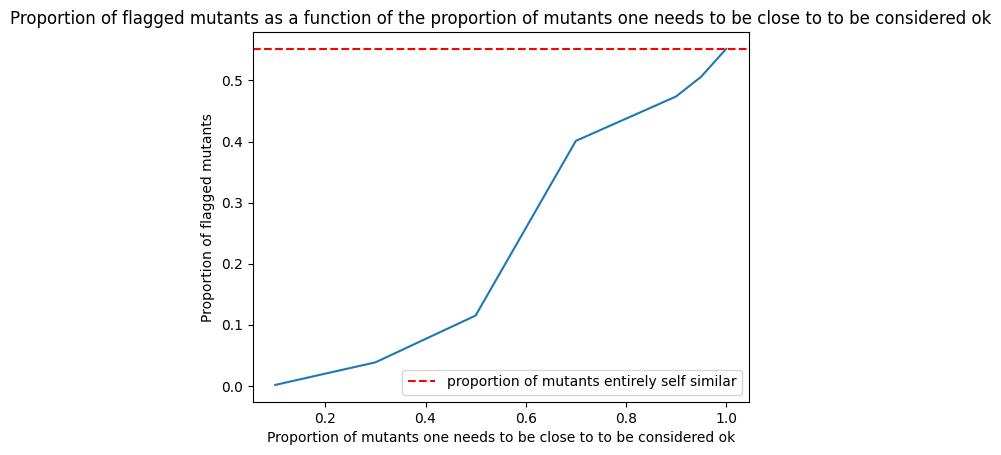

In [ ]:
plt.plot(p_list, proportions)
plt.axhline(y=proportions[-1], color='r', linestyle='--', label='proportion of mutants entirely self similar')
plt.legend()
plt.xlabel('Proportion of mutants one needs to be close to to be considered ok')
plt.ylabel('Proportion of flagged mutants')
plt.title('Proportion of flagged mutants as a function of the proportion of mutants one needs to be close to to be considered ok')